<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/images/IBM_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Python Exercise for Introductory Data Analysis

Estimated time needed: 60 minutes


This lab is designed to allow for running basic Python commands for Introductory Data Analysis. It covers some sample data uploads, pre-processing, analyzing and visualization. Python provides a very rich environment to conduct deeper analyses and build sophisticated statistical models. For learning such advanced techniques, the student is encouraged to register for ML and Datascience courses available through IBM's certification courses


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Setup">Setup</a></li>
    <li><a href="#Data">Data</a></li>  
    <li><a href="#Exercises">Exercises</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

Use Python to solve load data, pre-process it, analyze and visualize it.


## Setup

Operations in Python require certain libraries to be loaded, depending on the function that one is trying to use. There are several libraries available for use. Some Python enviroments come with pre-loaded libraries. However, in this exercise, we will see how to load such libraries


## Data 

###US Housing Market Factors

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/images/housing-cover.jpg" width="30%" alt="housing image">

US housing market depends on various factors. Here are some macroeconomic factors relevant to the market. The following attributes have been collected,

 - `Date`: Year 

 - `House_Price_Index`: House price change according to the index base period set (you can check the date at which this value is 100). 

 - `Stock_Price_Index`: Stock price change according to the index base period set (you can check the date at which this value is 100). 

 - `Consumer_Price_Index`: The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time. 

 - `Population`: Population of USA (unit: thousands). 

 - `Unemployment_Rate`: Unemployment rate of USA (unit: percentage). 

 - `Real_GDP`: GDP with adjusted inflation (Annual version unit: billions of chain 2012 dollars in, Monthly version unit: Annualised change). 

 - `Mortgage_Rate`: Interest charged on mortgages (unit: percentage). 

 - `Real_Disposable_Income` (Real Disposable Personal Income): Money left from salary after all the taxes are paid (unit: billions of chain 2012 dollars). 
 
Your task is to load the data, pre-process it, explore and visualize it


# Install Libraries


In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
import micropip
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await micropip.install(['ipywidgets'],keep_going=True)
await micropip.install(['tqdm'],keep_going=True)

# Exercises


### Exercise 1: Import numpy, pandas and matplotlib libraries into Jupyter 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 2: Create a dataframe from a csv file and display the size of the dataframe 


In [3]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/data/Annual_Macroeconomic_Factors.csv'
await download(path, "Annual_Macroeconomic_Factors.csv")
path="Annual_Macroeconomic_Factors.csv"

In [8]:
df = pd.read_csv("Annual_Macroeconomic_Factors.csv")
df.size
#df.shape

423

### Exercise 3: Create a reduced dataframe by dropping Stock_Price_Index


In [20]:
df.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,Date (as year)
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908,1975
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346,1976
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780,1977
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497,1978
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672,1979


In [10]:
df_reduced = df.drop("Stock_Price_Index", axis=1)
df_reduced

,Date,House_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.5250,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.4350,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,1978-01-01,83.7450,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,1979-01-01,95.1325,88.06755,1.10358,5.83333,6780.924,11.20365,21672
5,1980-01-01,102.6675,100.00000,0.95959,7.14167,6763.514,13.74212,21584
6,1981-01-01,107.2375,110.33472,0.98142,7.60000,6935.153,16.64151,21891
7,1982-01-01,108.4600,117.09981,0.95332,9.70833,6810.120,16.04365,22156
8,1983-01-01,116.2425,120.86156,0.91438,9.61667,7122.290,13.23538,22714
9,1984-01-01,121.4575,126.05926,0.86582,7.52500,7637.704,13.87769,24062


### Exercise 4: Create a smaller dataframe by dropping data that has Unemployment_Rate > 9.5% 


In [11]:
df_smaller = df_reduced[df_reduced['Unemployment_Rate'] <= 9.5]
df_smaller
#df_smaller.shape


,Date,House_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.5250,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.4350,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,1978-01-01,83.7450,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,1979-01-01,95.1325,88.06755,1.10358,5.83333,6780.924,11.20365,21672
5,1980-01-01,102.6675,100.00000,0.95959,7.14167,6763.514,13.74212,21584
6,1981-01-01,107.2375,110.33472,0.98142,7.60000,6935.153,16.64151,21891
9,1984-01-01,121.4575,126.05926,0.86582,7.52500,7637.704,13.87769,24062
10,1985-01-01,127.6625,130.52887,0.88613,7.19167,7956.170,12.43019,24565
11,1986-01-01,136.3750,133.00637,0.92416,6.99167,8231.664,10.18731,25268


### Exercise 5: Get the dimensions of the dataframe created in Question 4 


In [12]:
#df_smaller.shape

df_smaller.size

352

### Exercise 6: Create a dataframe by selecting Real_Disposable_Income and House_Price_Index attributes from the original dataset and print out the statistics for these attributes 


In [13]:
df_rdi_hpi = df[['Real_Disposable_Income', 'House_Price_Index']]
df_rdi_hpi.describe()

,Real_Disposable_Income,House_Price_Index
count,47.000000,47.000000
mean,32040.936170,240.145585
std,8006.301392,120.405988
min,19908.000000,61.090000
25%,25432.500000,140.788750
50%,31712.000000,211.462500
75%,38235.000000,339.353750
max,48219.000000,523.260000


### Exercise 7: Plot a scatter plot between House_Price_Index and Real_Disposable_Income 


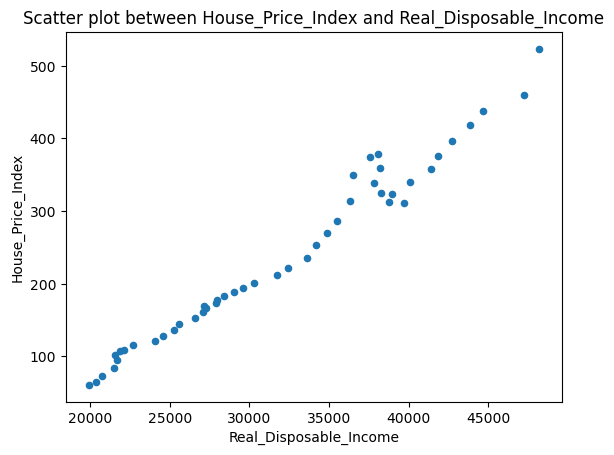

In [14]:
# Solution 1:
df_rdi_hpi.plot(kind='scatter', x='Real_Disposable_Income', y='House_Price_Index')
plt.title('Scatter plot between House_Price_Index and Real_Disposable_Income')
plt.xlabel('Real_Disposable_Income')
plt.ylabel('House_Price_Index')
plt.show()


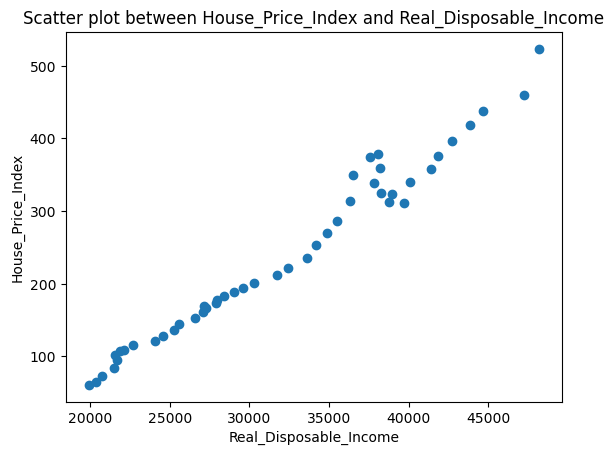

In [15]:
# Solution 2 (preferred):
x = df_rdi_hpi[['Real_Disposable_Income']]
y = df_rdi_hpi[['House_Price_Index']]
plt.scatter(x, y)
plt.title('Scatter plot between House_Price_Index and Real_Disposable_Income')
plt.xlabel('Real_Disposable_Income')
plt.ylabel('House_Price_Index')
plt.show()

### Exercise 8: Create a bar chart with date (as year) on X-axis and Real_GDP on the Y-axis 


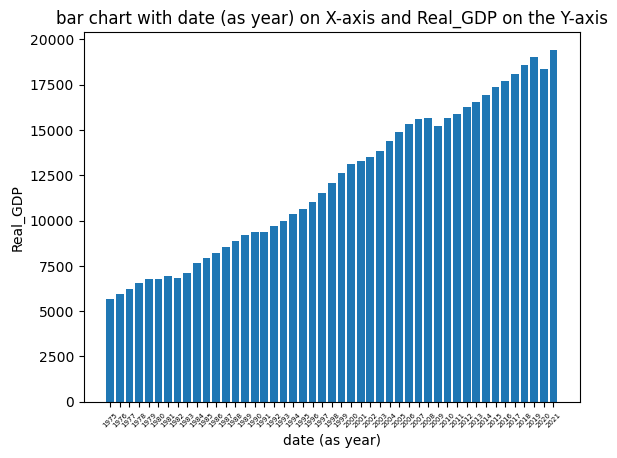

In [16]:
#Solution 1:
x = df['Date'].str.slice(0,4)  # 只截取年份
y = df['Real_GDP']
plt.bar(x, height = y)
plt.xticks(rotation=45, fontsize=5)  # 旋转标签文字以防止重叠，调整标签文字的大小。# 尝试一下：plt.xticks(x[::5], rotation=45)  每隔5个年份显示一个标签，旋转标签文字以防止重叠，这样看起来更美观。
plt.title('bar chart with date (as year) on X-axis and Real_GDP on the Y-axis')
plt.xlabel('date (as year)')
plt.ylabel('Real_GDP')
plt.show()

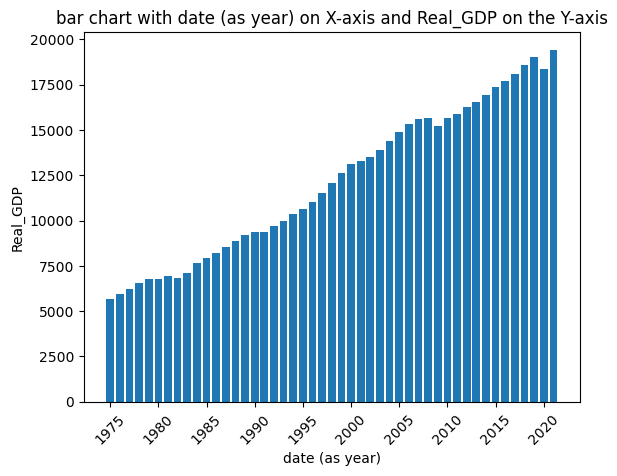

'\nx[::5] 是一个切片操作，它的含义如下：\n\nx：表示要切片的数组或列表。\n[::5]：切片的语法，包含三个部分：起始索引、结束索引和步长。\n\n具体解释：\n\n起始索引：未指定，表示从数组的第一个元素开始切片。\n结束索引：未指定，表示切片一直到数组的最后一个元素。\n步长：指定为5，表示每隔5个元素取一个。\n\n因此，x[::5] 返回了原始数组 x 中每隔5个元素取一个的子数组。这个子数组包含了原始数组中的某些元素，用于设置 x 轴上的刻度标签。\n'

In [17]:
#Solution 2:

lst=[]
for i in df['Date']:
    x = i[0:4]
    lst.append(x)

df['Date (as year)'] = lst # 这个方法，能直接把‘Date (as year)’列作为一个新列添加进df里面，记住这个方法。

#df[['Date (as year)', 'Real_GDP']]

x = df['Date (as year)']
y = df['Real_GDP']
plt.bar(x, height = y)
plt.xticks(x[::5], rotation=45)  # 每隔5个年份显示一个标签，旋转标签文字以防止重叠，这样看起来更美观。
plt.title('bar chart with date (as year) on X-axis and Real_GDP on the Y-axis')
plt.xlabel('date (as year)')
plt.ylabel('Real_GDP')
plt.show()


'''
x[::5] 是一个切片操作，它的含义如下：

x：表示要切片的数组或列表。
[::5]：切片的语法，包含三个部分：起始索引、结束索引和步长。

具体解释：

起始索引：未指定，表示从数组的第一个元素开始切片。
结束索引：未指定，表示切片一直到数组的最后一个元素。
步长：指定为5，表示每隔5个元素取一个。

因此，x[::5] 返回了原始数组 x 中每隔5个元素取一个的子数组。这个子数组包含了原始数组中的某些元素，用于设置 x 轴上的刻度标签。
'''


### Exercise 9: Create a combo chart with date on X-axis and Consumer_Price_Index on Y1-axis (bar) and Mortgage_Rate (line) on Y2-axis 


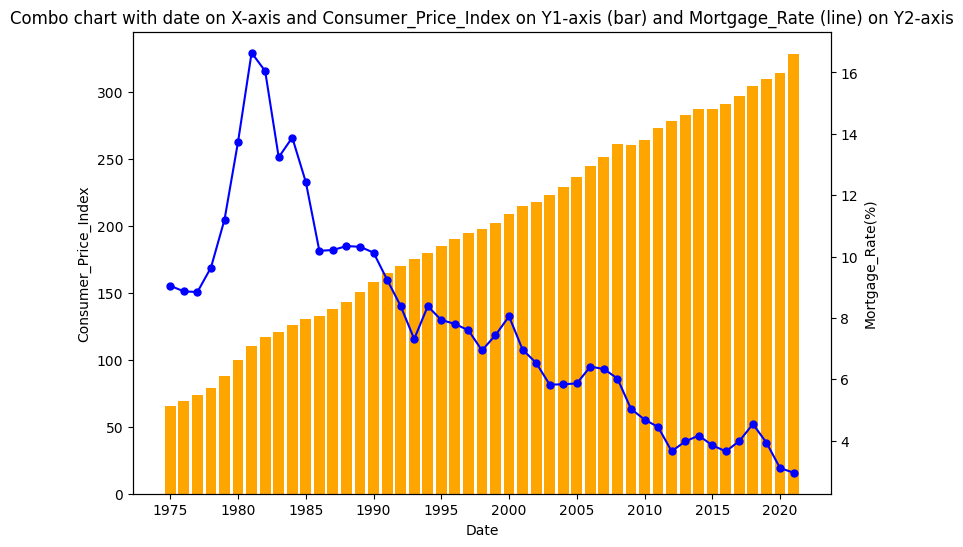

'\nx[::5] 是一个切片操作，它的含义如下：\n\nx：表示要切片的数组或列表。\n[::5]：切片的语法，包含三个部分：起始索引、结束索引和步长。\n\n具体解释：\n\n起始索引：未指定，表示从数组的第一个元素开始切片。\n结束索引：未指定，表示切片一直到数组的最后一个元素。\n步长：指定为5，表示每隔5个元素取一个。\n\n因此，x[::5] 返回了原始数组 x 中每隔5个元素取一个的子数组。这个子数组包含了原始数组中的某些元素，用于设置 x 轴上的刻度标签。\n'

In [18]:
# 创建一个图形和一个子图轴（Y1轴）
fig, ax1 = plt.subplots(figsize=(9, 6))

# 准备好x, y1, y2参数，以供接下来使用
x = df['Date (as year)']
y1 = df['Consumer_Price_Index']
y2 = df['Mortgage_Rate']

# 绘制Y1轴的柱状图
ax1.bar(x, y1, color="orange")
ax1.set_xlabel("Date")
ax1.set_ylabel("Consumer_Price_Index")

# 创建Y2轴，共享X轴 (记住这一行，非常有用)
ax2 = ax1.twinx()

# 绘制Y2轴的线图
ax2.plot(x, y2, color="blue", marker=".", markersize=10)
ax2.set_ylabel("Mortgage_Rate(%)")

# 设置标题
plt.title('Combo chart with date on X-axis and Consumer_Price_Index on Y1-axis (bar) and Mortgage_Rate (line) on Y2-axis')

# 每隔5个年份显示一个标签，旋转标签文字以防止重叠，这样看起来更美观。
plt.xticks(x[::5], rotation=45)  

plt.show()



'''
x[::5] 是一个切片操作，它的含义如下：

x：表示要切片的数组或列表。
[::5]：切片的语法，包含三个部分：起始索引、结束索引和步长。

具体解释：

起始索引：未指定，表示从数组的第一个元素开始切片。
结束索引：未指定，表示切片一直到数组的最后一个元素。
步长：指定为5，表示每隔5个元素取一个。

因此，x[::5] 返回了原始数组 x 中每隔5个元素取一个的子数组。这个子数组包含了原始数组中的某些元素，用于设置 x 轴上的刻度标签。
'''

### Exercise 10: Create sub-plots with Date on X-axis and Stock_Price_Index on subplot 1 and Consumer_Price_Index on subplot 2


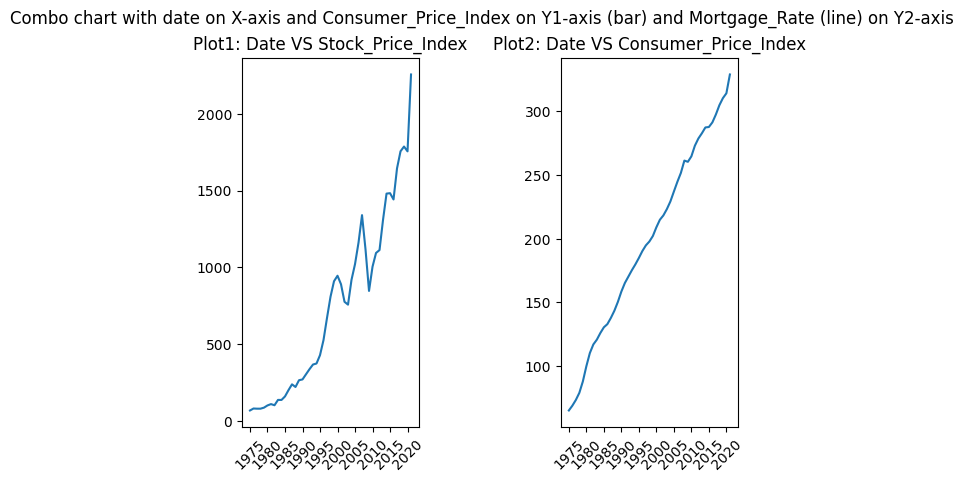

'\nx[::5] 是一个切片操作，它的含义如下：\n\nx：表示要切片的数组或列表。\n[::5]：切片的语法，包含三个部分：起始索引、结束索引和步长。\n\n具体解释：\n\n起始索引：未指定，表示从数组的第一个元素开始切片。\n结束索引：未指定，表示切片一直到数组的最后一个元素。\n步长：指定为5，表示每隔5个元素取一个。\n\n因此，x[::5] 返回了原始数组 x 中每隔5个元素取一个的子数组。这个子数组包含了原始数组中的某些元素，用于设置 x 轴上的刻度标签。\n'

In [19]:
# 创建一个画像和两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

# 准备好x, y1, y2参数，以供接下来使用
x = df['Date (as year)']
y1 = df['Stock_Price_Index']
y2 = df['Consumer_Price_Index']

# 绘制子图1的线图
ax1.plot(x, y1)
ax1.set_title('Plot1: Date VS Stock_Price_Index')
ax1.set_xticks(x[::5])  
ax1.set_xticklabels(x[::5], rotation=45)

# 绘制子图2的线图
ax2.plot(x, y2)
ax2.set_title('Plot2: Date VS Consumer_Price_Index')
ax2.set_xticks(x[::5])  
ax2.set_xticklabels(x[::5], rotation=45)

# 调整子图之间的水平间距，避免两个子图标题重叠
plt.subplots_adjust(wspace=0.8)  

# 设置整体标题，避免与两个子图的标题重叠
plt.suptitle('Combo chart with date on X-axis and Consumer_Price_Index on Y1-axis (bar) and Mortgage_Rate (line) on Y2-axis')

plt.show()



'''
x[::5] 是一个切片操作，它的含义如下：

x：表示要切片的数组或列表。
[::5]：切片的语法，包含三个部分：起始索引、结束索引和步长。

具体解释：

起始索引：未指定，表示从数组的第一个元素开始切片。
结束索引：未指定，表示切片一直到数组的最后一个元素。
步长：指定为5，表示每隔5个元素取一个。

因此，x[::5] 返回了原始数组 x 中每隔5个元素取一个的子数组。这个子数组包含了原始数组中的某些元素，用于设置 x 轴上的刻度标签。
'''

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                         |
| ----------------- | ------- | ---------- | ---------------------------------------------------------- |
| 2022-01-24        | 1.2     | Lakshmi     | Added logo and piplite updates |


## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
